In [1]:
import pandas as pd
import numpy as np
import math

rawdata1 = pd.read_excel("../Python_ST_EX/dataset/tourdata2017_1.xlsx")
rawdata2 = pd.read_excel("../Python_ST_EX/dataset/tourdata2017_2.xlsx")
rawdata3 = pd.read_excel("../Python_ST_EX/dataset/tourdata2017_3.xlsx")

# 컬럼명 통일 (공백제거, 소문자 맞춤)

rawdata1.rename(columns=lambda x: x.strip().lower(), inplace=True)
rawdata2.rename(columns=lambda x: x.strip().lower(), inplace=True)
rawdata3.rename(columns=lambda x: x.strip().lower(), inplace=True)
# rawdata3.columns = map(str.lower, rawdata3.columns)

In [2]:
# 1. m_id 빈 값 지우기

rawdata2 = rawdata2.dropna(subset=["m_id"])
rawdata3 = rawdata3.dropna(subset=["m_id"])

# 국내여행자만 보기

rawdata2 = rawdata2[rawdata2["type1"] == 1]
rawdata3 = rawdata3[rawdata3["type1"] == 1]

# 필요한 컬럼만 추출

rawdata1 = rawdata1.drop(['sr_type','ara_size', 'school1','school2','marry','inc2_1','wt'], axis = 1)

rawdata2 = rawdata2[["hid","pid","type1","month","q1","q2_c_1","q2_c_2","q3","q4_a",
                       "q5","q5_1","q5_2_1","q5_2_2","q5_2_3","q5_2_4","q5_2_5","q5_2_6",
                      "q7","q7_1","q7_3_1","q7_3_2","q7_3_3","q7_3_4","q7_3_5","q7_3_6","q7_3_7","q7_3_8","q7_3_9","q7_3_10",
                      "q8","q8_1","q8_2","q8_3","q8_4","q8_5","q8_6","q8_7",
                      "q10_1","q10_2","q10_3","q10_4","q10_5","q10_6","q10_7","q10_8","q10_9","q10_10","q10_11","q10_12"]]

rawdata3 = rawdata3.drop(['m_id','type2','q6_1_7','q6_1_8','q6_5_1a','q6_5_2a','q6_5_3a','q6_5_4a','q6_5_5a','q6_5_6a','q6_5_7a','q6_5_8a','q6_5_9a','q6_5_10a','q6_5_11a','q6_5_12a','q6_5_13a', 'wt'], axis = 1)

In [3]:
# 1차 join = 같은 응답자의 단위여행 데이터와, 방문지 데이터를 합친다.

joinKey = ["hid","pid","month"]

firstmerge = pd.merge(rawdata2, rawdata3, left_on=joinKey, right_on=joinKey, how="left")

In [5]:
rawdata1["age_group"] = np.where(rawdata1["age"]>0, (((rawdata1["age"]/10).astype(int))*10) , 0)

rawdata1 = rawdata1[rawdata1.age_group==20]

In [6]:
# 2차 join 데이터 = 같은 응답자의 응답자 정보와 1차 join 데이터를 합친다.

joinKey2 = ["hid","pid"]

secondmerge = pd.merge(rawdata1, firstmerge, left_on=joinKey2, right_on=joinKey2, how="left")

secondmerge = secondmerge.dropna(subset=["q7"])

secondmerge

,hid,pid,sex,age,sido,occ0,occ1,occ2,fac,inc1_1,...,q6_6_16,q6_6_17,q6_6_18,q6_6_19,q6_6_20,q6_6_21,q6_7,q6_8,q6_9,q7_2
0,10003,1000303,2,28,1,NaN,16,14,3,2500,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,3.0,300000.0
4,10019,1001904,2,23,1,NaN,14,12,4,6500,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,200000.0
5,10019,1001904,2,23,1,NaN,14,12,4,6500,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,200000.0
7,10031,1003105,1,21,1,NaN,14,12,5,8400,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,5.0,100000.0
8,10031,1003105,1,21,1,NaN,14,12,5,8400,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0,5.0,100000.0
9,10031,1003105,1,21,1,NaN,14,12,5,8400,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,100000.0
10,10031,1003105,1,21,1,NaN,14,12,5,8400,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0,5.0,100000.0
11,10031,1003105,1,21,1,NaN,14,12,5,8400,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,100000.0
13,10045,1004503,2,22,1,NaN,14,12,3,3600,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,4.0,250000.0
14,10045,1004503,2,22,1,NaN,14,12,3,3600,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,150000.0


In [7]:
satisfaction = secondmerge.dropna(subset=["q10_1"]).reset_index(drop = True)

# 항목별 만족도에서 9.경험해보지 못함 -> 0으로 바꿈

satisfaction.loc[:,"q10_1":"q10_12"] = np.where(satisfaction.loc[:,"q10_1":"q10_12"] == 9,0,satisfaction.loc[:,"q10_1":"q10_12"])

tempList = []
for i in range(0,len(satisfaction)):
    zeroCount = 0
    for j in satisfaction.loc[i,"q10_1":"q10_12"]:
        if j==0:
            zeroCount += 1
    tempList.append(
     (round((math.pow((sum(satisfaction.loc[i,"q10_1":"q10_12"]) / (12-zeroCount)), 2)) * 10) / 10) * 1.2
     + (math.pow((satisfaction.loc[i,"q6_7"]), 2) * 1.6)
     + (math.pow((satisfaction.loc[i,"q6_8"]), 2) * 0.8)
     + (math.pow((satisfaction.loc[i,"q6_9"]), 2) * 0.4))

colName = "q10_grade"
tempDF = pd.DataFrame(tempList, columns=[colName])
result01 = pd.concat([satisfaction, tempDF], axis=1)

result01.q10_grade.min()

# 1~16의 직업군을 4개의 직업코드로 분류함
wowList = []
for i in range(0,len(result01)):
    jobCode = 1231231247
    j = result01["occ1"][i]
    if ((j == 14) | (j == 15)):
        #대학생
        jobCode = 0
    elif j < 10:
        #직장인
        jobCode = 1
    elif j == 16:
        #무직
        jobCode = 2
    elif j == 10:
        #군인
        jobCode = 3
    else:
        jobCode = 4
    wowList.append(jobCode)

colName = "job_group"
tempDF = pd.DataFrame(wowList, columns=[colName])
wowResult = pd.concat([result01, tempDF], axis=1)

#대학생: jobCode = 0
#직장인: jobCode = 1
#무직: jobCode = 2
#군인: jobCode = 3
#주부, 농어업, 관리자...etc: jobCode = 4

In [8]:
soldierData = wowResult[(wowResult.job_group == 3)]

In [9]:
import pandas as pd
import numpy as np

# 모델 라이브러리 선언
from sklearn import datasets, tree
from sklearn.linear_model import LinearRegression

# 모델 정확도 라이브러리 선언
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [10]:
#특성 선정 데이터분리
corrDf = soldierData.corr()
corrDf.head()

,hid,pid,sex,age,sido,occ0,occ1,occ2,fac,inc1_1,...,q6_6_18,q6_6_19,q6_6_20,q6_6_21,q6_7,q6_8,q6_9,q7_2,q10_grade,job_group
hid,1.000000,0.988474,NaN,-0.293677,-0.158636,NaN,NaN,-0.010178,-0.232826,0.220292,...,NaN,NaN,NaN,NaN,-0.295690,-0.186088,-0.228221,0.142627,-0.211073,NaN
pid,0.988474,1.000000,NaN,-0.324029,-0.233350,NaN,NaN,-0.019044,-0.110570,0.304706,...,NaN,NaN,NaN,NaN,-0.313842,-0.188890,-0.250479,0.167850,-0.232444,NaN
sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,-0.293677,-0.324029,NaN,1.000000,0.286415,NaN,NaN,0.290970,-0.070177,0.018445,...,NaN,NaN,NaN,NaN,0.372348,0.184238,0.303407,-0.594584,0.297504,NaN
sido,-0.158636,-0.233350,NaN,0.286415,1.000000,NaN,NaN,-0.256307,-0.594503,-0.350556,...,NaN,NaN,NaN,NaN,-0.277040,-0.311589,-0.248477,-0.037724,-0.249615,NaN


In [11]:
#인덱스 컬럼 초기화
corrResult = corrDf.reset_index()
corrResult.head()

,index,hid,pid,sex,age,sido,occ0,occ1,occ2,fac,...,q6_6_18,q6_6_19,q6_6_20,q6_6_21,q6_7,q6_8,q6_9,q7_2,q10_grade,job_group
0,hid,1.000000,0.988474,NaN,-0.293677,-0.158636,NaN,NaN,-0.010178,-0.232826,...,NaN,NaN,NaN,NaN,-0.295690,-0.186088,-0.228221,0.142627,-0.211073,NaN
1,pid,0.988474,1.000000,NaN,-0.324029,-0.233350,NaN,NaN,-0.019044,-0.110570,...,NaN,NaN,NaN,NaN,-0.313842,-0.188890,-0.250479,0.167850,-0.232444,NaN
2,sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,age,-0.293677,-0.324029,NaN,1.000000,0.286415,NaN,NaN,0.290970,-0.070177,...,NaN,NaN,NaN,NaN,0.372348,0.184238,0.303407,-0.594584,0.297504,NaN
4,sido,-0.158636,-0.233350,NaN,0.286415,1.000000,NaN,NaN,-0.256307,-0.594503,...,NaN,NaN,NaN,NaN,-0.277040,-0.311589,-0.248477,-0.037724,-0.249615,NaN


In [12]:
features = []
#features.append("q3") #여행목적
#features.append("q4_a") #정보획득지
features.append("q1") # 당일/숙박 여행 여부
features.append("q8") #사전예약여부
features

['q1', 'q8']

In [13]:
label = ['q10_grade']
label

['q10_grade']

In [14]:
# 데이터 분리 & null값 0으로 대체

# features = 특성, label = 답지
trainingData_features = soldierData[soldierData.index%4 != 0][features]
trainingData_features = trainingData_features.fillna(0)
trainingData_label = soldierData[soldierData.index%4 != 0][label]
trainingData_label = trainingData_label.fillna(0)

testData_features = soldierData[soldierData.index%4 == 0][features]
testData_features = testData_features.fillna(0)
# 맨뒤에 [label]이 없는 이유는 전체를 같이 보기 위해서
testData_label = soldierData[soldierData.index%4 == 0]
testData_label = testData_label.fillna(0)

In [15]:
# Define Model (모델 정의)
model_method = tree.DecisionTreeRegressor()

# Learning (Feature & Label)
# trainingData_features, trainingData_label을 인자로 던져주면 모델을 만들어줌.
# fit<< 학습시킬때 쓰는 함수, 학습할 특성과 학습할 답지 모두 인자로 던져주어야함.
model = model_method.fit(trainingData_features, trainingData_label)
model

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [16]:
# Define Model (모델 정의)
model_method2 = LinearRegression()

# Learning (Feature & Label)
# trainingData_features, trainingData_label을 인자로 던져주면 모델을 만들어줌.
# fit<< 학습시킬때 쓰는 함수, 학습할 특성과 학습할 답지 모두 인자로 던져주어야함.
model2 = model_method2.fit(trainingData_features, trainingData_label)
model2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
testData = testData_label.reset_index(drop = True)
testData

,hid,pid,sex,age,sido,occ0,occ1,occ2,fac,inc1_1,...,q6_6_18,q6_6_19,q6_6_20,q6_6_21,q6_7,q6_8,q6_9,q7_2,q10_grade,job_group
0,11314,1131403,1,22,8,0.0,10,15,4,5000,...,0.0,0.0,0.0,0.0,4.0,4.0,4.0,60000.0,60.88,3
1,11573,1157304,1,28,8,0.0,10,15,4,4800,...,0.0,0.0,0.0,0.0,5.0,5.0,5.0,25000.0,85.60,3
2,11573,1157304,1,28,8,0.0,10,15,4,4800,...,0.0,0.0,0.0,0.0,4.0,4.0,4.0,30000.0,56.92,3
3,11573,1157304,1,28,8,0.0,10,15,4,4800,...,0.0,0.0,0.0,0.0,5.0,5.0,5.0,30000.0,89.20,3
4,11573,1157304,1,28,8,0.0,10,15,4,4800,...,0.0,0.0,0.0,0.0,5.0,4.0,4.0,100000.0,80.92,3
5,12126,1212603,1,22,11,0.0,10,6,3,2000,...,0.0,0.0,0.0,0.0,4.0,4.0,4.0,100000.0,64.00,3
6,15331,1533103,1,25,10,0.0,10,15,4,7500,...,0.0,0.0,0.0,0.0,3.0,3.0,3.0,70000.0,37.08,3


In [18]:
predict = model.predict(testData_features)
predict

### 데이터프레임으로 변환(DecisionTreeRegression)
predictData = pd.DataFrame(predict)

#컬럼헤더명 바꾸기
predictData.columns = ["DecisionTree Regression"]

#컬럼 인덱스를 통해서 컬럼헤더명 바꾸기
#predictData = predictData.rename(columns = {0:"PREDICT"})
predictData = predictData.reset_index(drop = True)

In [19]:
predict2 = model2.predict(testData_features)
predict2

### 데이터프레임으로 변환(LinearRegression)
predictData2 = pd.DataFrame(predict2)

#컬럼헤더명 바꾸기
predictData2.columns = ["LinearRegression"]

#컬럼 인덱스를 통해서 컬럼헤더명 바꾸기
#predictData = predictData.rename(columns = {0:"PREDICT"})
predictData2 = predictData2.reset_index(drop = True)

In [20]:
resultData = pd.concat([testData, predictData,predictData2], axis=1)
resultData

,hid,pid,sex,age,sido,occ0,occ1,occ2,fac,inc1_1,...,q6_6_20,q6_6_21,q6_7,q6_8,q6_9,q7_2,q10_grade,job_group,DecisionTree Regression,LinearRegression
0,11314,1131403,1,22,8,0.0,10,15,4,5000,...,0.0,0.0,4.0,4.0,4.0,60000.0,60.88,3,65.432941,65.355423
1,11573,1157304,1,28,8,0.0,10,15,4,4800,...,0.0,0.0,5.0,5.0,5.0,25000.0,85.60,3,65.432941,65.355423
2,11573,1157304,1,28,8,0.0,10,15,4,4800,...,0.0,0.0,4.0,4.0,4.0,30000.0,56.92,3,65.432941,65.355423
3,11573,1157304,1,28,8,0.0,10,15,4,4800,...,0.0,0.0,5.0,5.0,5.0,30000.0,89.20,3,82.000000,83.317803
4,11573,1157304,1,28,8,0.0,10,15,4,4800,...,0.0,0.0,5.0,4.0,4.0,100000.0,80.92,3,48.880000,50.197803
5,12126,1212603,1,22,11,0.0,10,6,3,2000,...,0.0,0.0,4.0,4.0,4.0,100000.0,64.00,3,65.432941,65.355423
6,15331,1533103,1,25,10,0.0,10,15,4,7500,...,0.0,0.0,3.0,3.0,3.0,70000.0,37.08,3,65.432941,65.355423


In [21]:
#DecisionTree Regression 정확도분석 
### MAE
mean_absolute_error(resultData["q10_grade"], resultData["DecisionTree Regression"])

import math

### RMSE (MSE)
math.sqrt(mean_squared_error(resultData["q10_grade"], resultData["DecisionTree Regression"]))

### R2
r2_score(resultData["q10_grade"], resultData["DecisionTree Regression"])

-0.15106078276242685

In [22]:
#Linear Regression 정확도분석
### MAE
mean_absolute_error(resultData["q10_grade"], resultData["LinearRegression"])

import math

### RMSE (MSE)
math.sqrt(mean_squared_error(resultData["q10_grade"], resultData["LinearRegression"]))

### R2
r2_score(resultData["q10_grade"], resultData["LinearRegression"])

-0.10112489620959075

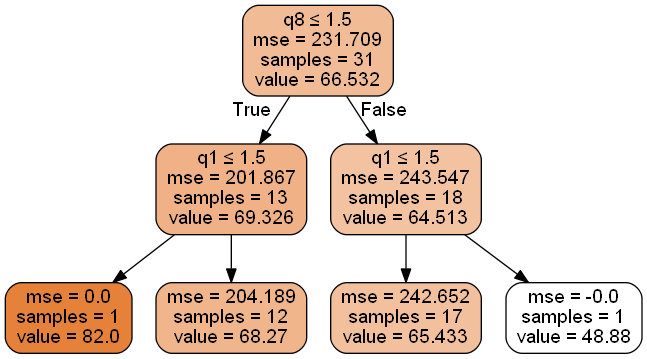

In [23]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, 
                rounded=True,
                filled = True,
                feature_names=features,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [24]:
import cFunction as cf

MAE : 14.61
MSE : 340.61
RMSE : 18.46
R2 : -0.15


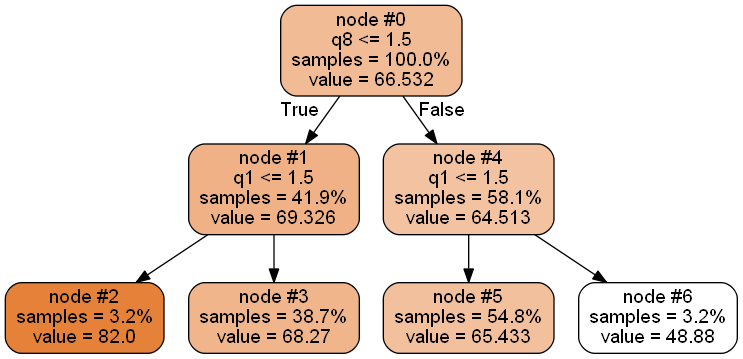

In [25]:
cf.decisionTreeRegressor(soldierData, features, label)